In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ticker_code = "IBM"

df = yf.download(ticker_code, start='2025-01-01', end='2025-06-13', group_by='ticker')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100
2025-01-06,220.059766,221.391973,217.839432,219.734116,2846700
2025-01-07,220.405183,223.720883,219.892035,221.007141,3299300
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800


In [2]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'])

print("ADF TEST RESULTS:")
print(adf_test)

ADF TEST RESULTS:
(-1.5061127445246913, 0.5304853134293476, 0, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 605.8878516839918)


In [4]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Close'] , regression = 'ct')
print("KPSS TEST RESULTS: ")
print(kpss_test)

KPSS TEST RESULTS: 
(0.18140322105728537, 0.022973792103517982, 6, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})


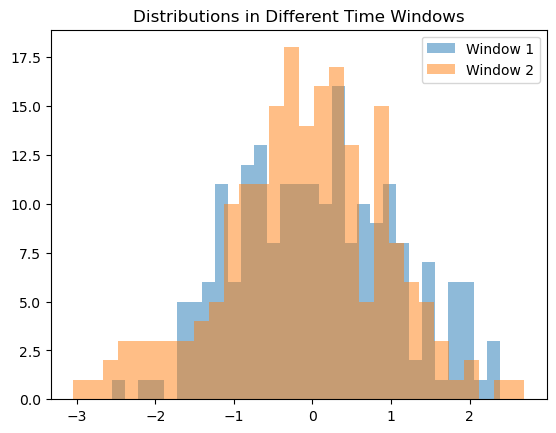

KS Statistic: 0.0900, P-Value: 0.3935
Fail to reject null: Distributions are similar ⇒ Possible stationarity.


In [5]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt

# Generate some data (replace with your own time series)
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)

# Split into two (or more) non-overlapping windows
window_size = 200
window1 = data[0:window_size]
window2 = data[400:400+window_size]  # Later window to avoid correlation

# Plot for visualization
plt.hist(window1, bins=30, alpha=0.5, label='Window 1')
plt.hist(window2, bins=30, alpha=0.5, label='Window 2')
plt.legend()
plt.title("Distributions in Different Time Windows")
plt.show()

# Perform KS test
statistic, p_value = ks_2samp(window1, window2)
print(f"KS Statistic: {statistic:.4f}, P-Value: {p_value:.4f}")

# Interpret result
if p_value > 0.05:
    print("Fail to reject null: Distributions are similar ⇒ Possible stationarity.")
else:
    print("Reject null: Distributions are different ⇒ Likely non-stationarity.")
